In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd

%matplotlib inline

In [9]:
df_airline = pd.read_csv(r"C:\Users\Sudeep\Downloads\airline_passengers.csv")
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [11]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [15]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [19]:
df_airline.dropna(axis=0,inplace=True)

In [21]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [23]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [25]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [27]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [29]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [31]:
df_airline.set_index('Month', inplace=True)

In [33]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

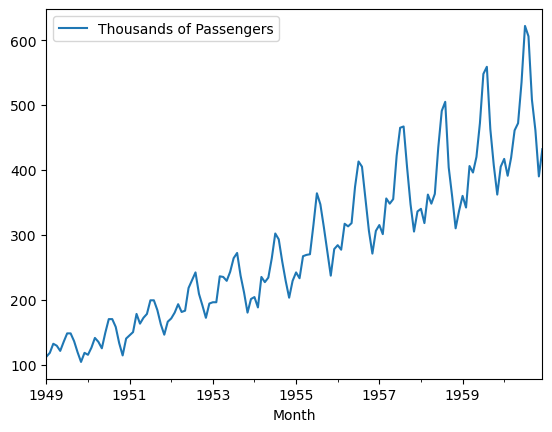

In [35]:
df_airline.plot()

In [37]:
# The data is Seasonal. so it cannot be stationary. So we use dickey fuller test to make it seasonal/ stationary

from statsmodels.tsa.stattools import adfuller

In [39]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [41]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060597
p- value: 0.9918802434376411
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
# shifting and differencing with shift=1

## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [47]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [51]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.829266824169992
p- value: 0.0542132902838265
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [53]:
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [57]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [59]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468527
p- value: 2.732891850014085e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [68]:
# 12 months

df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [70]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [74]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924805
p- value: 0.011551493085514982
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

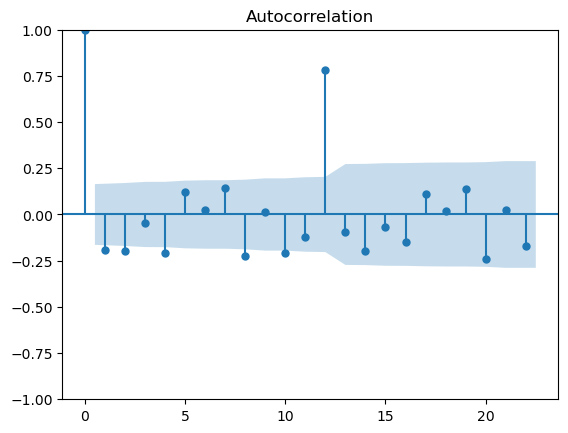

In [78]:
# ACF


acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

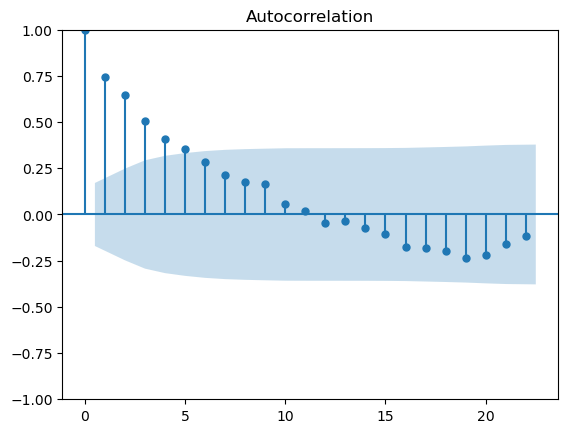

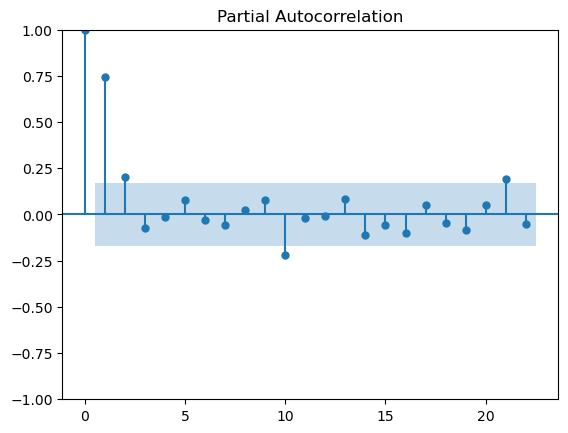

In [80]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

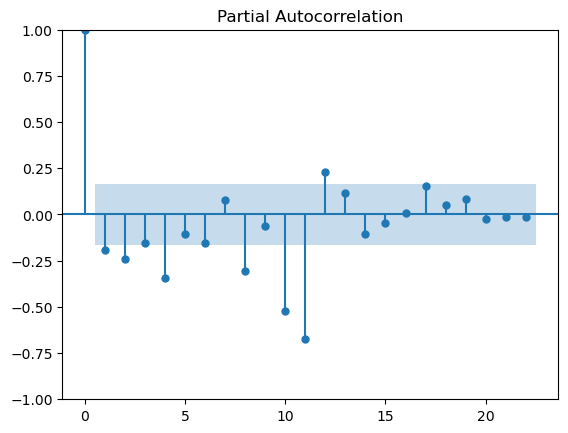

In [82]:
result = plot_pacf(df_airline["Passengers Second Difference"].dropna())

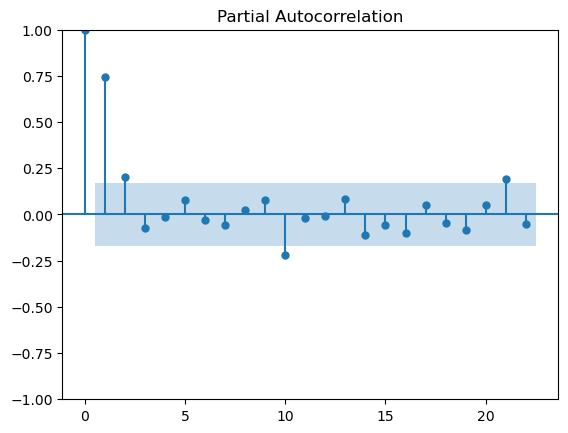

In [84]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

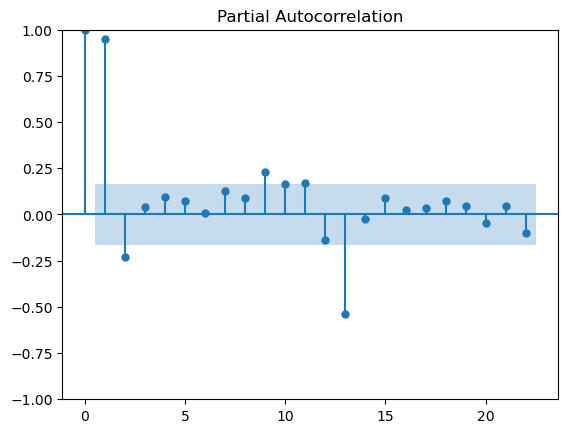

In [106]:
pacf12 = plot_pacf(df_airline["Thousands of Passengers"])

In [86]:
### split train and test data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [88]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [92]:


train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]



In [94]:


##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]



In [96]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [112]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA


In [114]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [116]:
# model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 0))
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 0))



C:\Users\Sudeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sudeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sudeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [118]:
model_Arima_fit=model_ARIMA.fit()

In [120]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Fri, 06 Sep 2024   AIC                            736.477
Time:                             15:41:47   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [122]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [124]:


##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)



1956-01-01 00:00:00
1960-12-01 00:00:00


In [126]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [128]:
pred

1956-01-01    300.183614
1956-02-01    309.478356
1956-03-01    316.443014
1956-04-01    307.827542
1956-05-01    318.544233
1956-06-01    348.922083
1956-07-01    366.020290
1956-08-01    346.567535
1956-09-01    332.120967
1956-10-01    307.734752
1956-11-01    311.623911
1956-12-01    339.828198
1957-01-01    349.840408
1957-02-01    356.098235
1957-03-01    350.687826
1957-04-01    350.080462
1957-05-01    361.157693
1957-06-01    381.216518
1957-07-01    382.319377
1957-08-01    372.852580
1957-09-01    364.110094
1957-10-01    356.108923
1957-11-01    371.293790
1957-12-01    385.323598
1958-01-01    392.077841
1958-02-01    391.405851
1958-03-01    388.404579
1958-04-01    391.572857
1958-05-01    402.448082
1958-06-01    413.255688
1958-07-01    410.853418
1958-08-01    407.670544
1958-09-01    402.486334
1958-10-01    406.089147
1958-11-01    418.125316
1958-12-01    426.012379
1959-01-01    429.205584
1959-02-01    427.352232
1959-03-01    428.150988
1959-04-01    432.790849


In [130]:
residuals

Month
1956-01-01    -16.183614
1956-02-01    -32.478356
1956-03-01      0.556986
1956-04-01      5.172458
1956-05-01     -0.544233
1956-06-01     25.077917
1956-07-01     46.979710
1956-08-01     58.432465
1956-09-01     22.879033
1956-10-01     -1.734752
1956-11-01    -40.623911
1956-12-01    -33.828198
1957-01-01    -34.840408
1957-02-01    -55.098235
1957-03-01      5.312174
1957-04-01     -2.080462
1957-05-01     -6.157693
1957-06-01     40.783482
1957-07-01     82.680623
1957-08-01     94.147420
1957-09-01     39.889906
1957-10-01     -9.108923
1957-11-01    -66.293790
1957-12-01    -49.323598
1958-01-01    -52.077841
1958-02-01    -73.405851
1958-03-01    -26.404579
1958-04-01    -43.572857
1958-05-01    -39.448082
1958-06-01     21.744312
1958-07-01     80.146582
1958-08-01     97.329456
1958-09-01      1.513666
1958-10-01    -47.089147
1958-11-01   -108.125316
1958-12-01    -89.012379
1959-01-01    -69.205584
1959-02-01    -85.352232
1959-03-01    -22.150988
1959-04-01    -36.7

<Axes: ylabel='Density'>

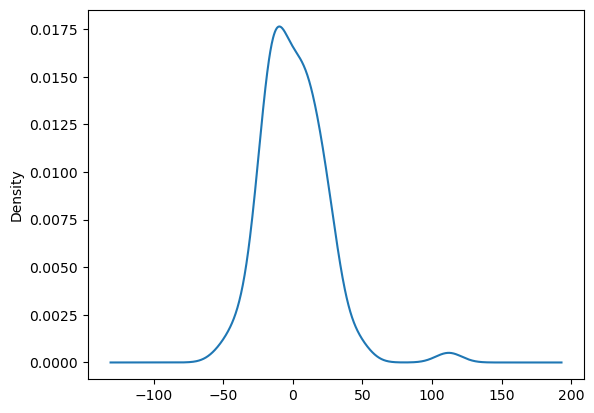

In [132]:
model_Arima_fit.resid.plot(kind='kde')

In [134]:
test_data['Predicted_ARIMA']=pred

C:\Users\Sudeep\AppData\Local\Temp\ipykernel_9800\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='Month'>

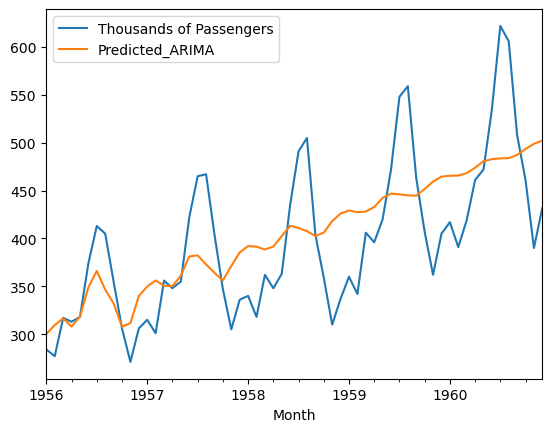

In [136]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

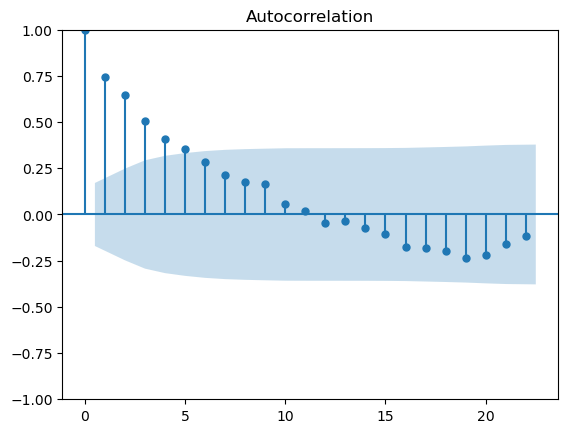

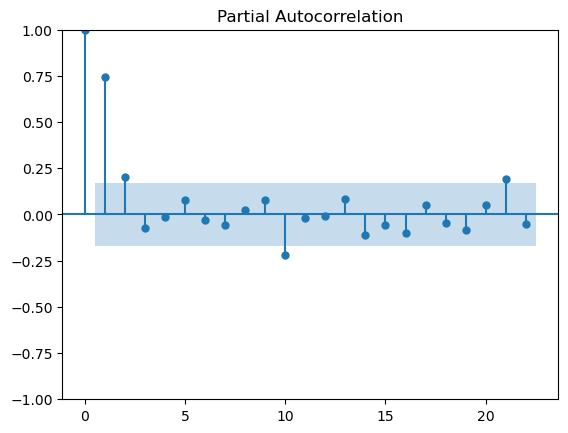

In [138]:


acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())



SARIMAX

In [142]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX




In [144]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,6),seasonal_order=(0,1,0,12))

C:\Users\Sudeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Sudeep\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [146]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\Sudeep\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [148]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 6)x(0, 1, [], 12)   Log Likelihood                -265.222
Date:                             Fri, 06 Sep 2024   AIC                            550.444
Time:                                     15:57:30   BIC                            573.210
Sample:                                 01-01-1949   HQIC                           559.507
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4751      2.076      0.229      0.819      -3.593       4.544
ar.L2          0.8446      0.346      2.445      0.015       0.167       1.522
ar.L3         -0.3478      1.759     -0.198      0.843      -3.795       3.099
ma.L1          0.3074      2.313      0.133      0.894      -4.226       4.840
ma.L2         -0.4499      1.456     -0.309      0.757      -3.303       2.403
ma.L3         -0.1199      0.421     -0.285      0.776      -0.944       0.704
ma.L4         -0.1590      0.498     -0.319      0.749      -1.135       0.817
ma.L5          0.2264      0.441      0.513      0.608      -0.638       1.091
ma.L6          0.0294      0.309      0.095      0.924      -0.576       0.634
sigma2        87.5723     74.467      1.176      0.240     -58.380     233.524
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 2.80
Prob(Q):                              0.87   Prob(JB):                         0.25
Heteroskedasticity (H):               2.03   Skew:                             0.47
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [150]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,483.883983
1960-09-01,508.0,-98.0,-82.0,45.0,487.184107
1960-10-01,461.0,-47.0,51.0,54.0,493.432789
1960-11-01,390.0,-71.0,-24.0,28.0,498.930080
1960-12-01,432.0,42.0,113.0,27.0,502.159831


In [152]:


##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)



1956-01-01 00:00:00
1960-12-01 00:00:00


In [154]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<Axes: xlabel='Month'>

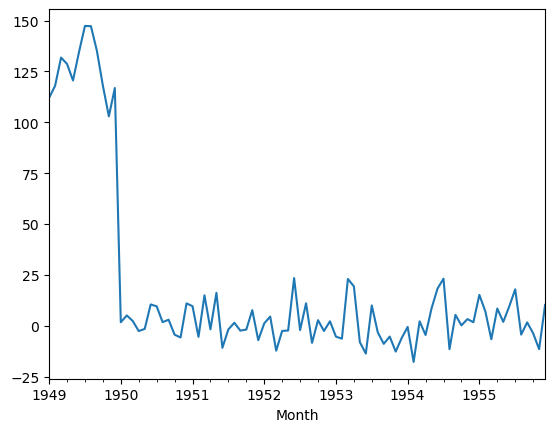

In [156]:
model_SARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

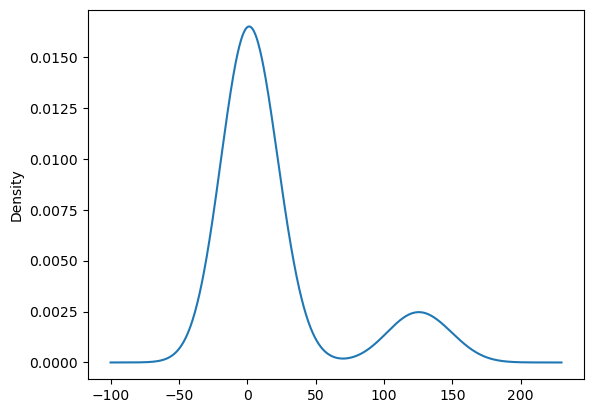

In [158]:
model_SARIMA_fit.resid.plot(kind='kde')

In [160]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\Sudeep\AppData\Local\Temp\ipykernel_9800\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [162]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183614,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,309.478356,NaN
1956-03-01,317.0,40.0,47.0,50.0,316.443014,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,307.827542,NaN
1956-05-01,318.0,5.0,9.0,48.0,318.544233,NaN
1956-06-01,374.0,56.0,51.0,59.0,348.922083,NaN
1956-07-01,413.0,39.0,-17.0,49.0,366.020290,403.408289
1956-08-01,405.0,-8.0,-47.0,58.0,346.567535,385.156523
1956-09-01,355.0,-50.0,-42.0,43.0,332.120967,349.505266


<Axes: xlabel='Month'>

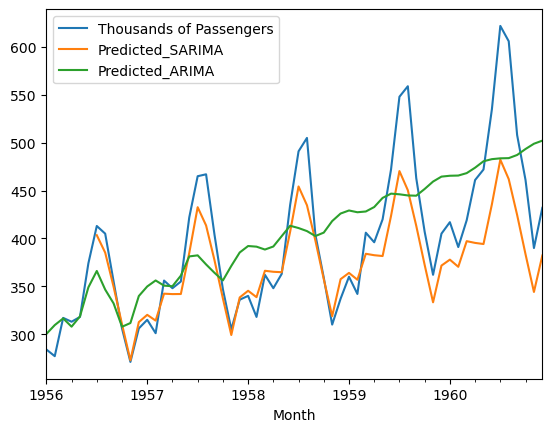

In [164]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()